# Support Vector Machine (P1)


In this tutorial, we will explore the concept of Support Vector Machines (SVM) and derive the optimization problem associated with it. SVM is a supervised machine learning algorithm used for classification and regression tasks. It aims to find a hyperplane that separates the input data points based on their labels.

In the SVM problem, we are given a set of data points represented as $(x_i, y_i) \in \mathbb{R}^n \times {-1, 1}$, where $x_i$ is the input feature vector and $y_i$ is its corresponding label. The objective of SVM is to find a hyperplane associated with two parameters $(w, b) \in \mathbb{R}^n \times \mathbb{R}$ that can effectively separate the data points based on their labels.
The hyperplane is defined as $P = \{z \in \mathbb{R}^n: \langle w, z\rangle + b = 0\}$, where $\langle w, z\rangle$ denotes the dot product of vectors $w$ and $z$. The goal is to find the hyperplane $P$ that maximizes the margin between the data points of different classes. That is to maximize $\gamma$ with $\gamma  = \min_{i=1,..., n} \gamma_i$.
By definition of $\gamma_i$, the problem can be rewritten 
$$\begin{aligned}
\max \quad & \gamma\\
\text{ s.t. } \quad &  \frac{y_i(\langle w, x_i\rangle + b)}{||w||} \geq \gamma
\end{aligned}$$


By the change of variable $w' = w/(\gamma ||w||)$ and $b' = b/(\gamma ||w||)$, we observe that  $\gamma =1/||w'||$ and the problem is therefore equivalent to
$$\begin{aligned}
\min_{w, b} \quad & \frac{1}{2}||w'||^2\\
\text{ s.t. } \quad & y_i(\langle w', x_i\rangle + b') \geq 1
\end{aligned}$$

(325, 2) (325,)
-2.5573847392532034 2.70702701966752


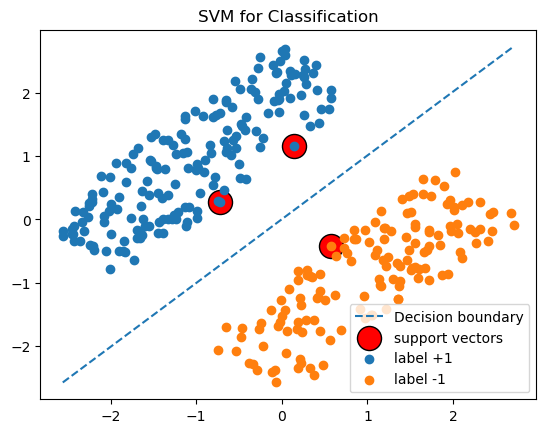

In [68]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

# 1. Generate data
def rotate(p, origin=(0, 0), degrees=0):
    p = p.T
    angle = np.deg2rad(degrees)
    R = np.array([[np.cos(angle), -np.sin(angle)],
                  [np.sin(angle),  np.cos(angle)]])
    o = np.atleast_2d(origin)
    p = np.atleast_2d(p)
    return np.squeeze((R @ (p.T-o.T) + o.T).T).T

def generate_points():
	np.random.seed(12) 
	p = np.random.uniform(low=-2, high=2, size=(500, 2)).T

	margin = 0.7
	pos = p[1]>=margin
	neg = p[1]<=-margin
	x_pos = p[:, pos]
	x_neg = p[:, neg]
	x_pos = rotate(x_pos, origin=(0, 0), degrees = 45)
	x_neg = rotate(x_neg, origin=(0, 0), degrees = 45)
        
	return x_pos, x_neg

x_pos, x_neg = generate_points()
n = x_pos.shape[1] + x_neg.shape[1]
X = np.hstack([x_pos, x_neg]).T
y = np.hstack([- np.ones(x_pos.shape[1]), np.ones(x_neg.shape[1])])
print(X.shape, y.shape)


# Step 2: Create and Train the SVM Model
model = svm.SVC(kernel='linear')
model.fit(X, y)
support_vectors = model.support_vectors_.T
w = model.coef_[0][0]
b = model.intercept_[0]


# Step 3. Plot
x_min, x_max = X.T[0].min(), X.T[0].max()
print(x_min, x_max)
x_grid =  np.linspace(x_min, x_max, 100)
y_values = w*x_grid + b 
plt.plot(x_grid, y_values, ls="--", label="Decision boundary")

plt.scatter(support_vectors[0], support_vectors[1], label = "support vectors", color="red", edgecolors='black', s=300)
plt.scatter(x_pos[0], x_pos[1], label = "label +1")
plt.scatter(x_neg[0], x_neg[1], label = "label -1")
plt.legend()
plt.title('SVM for Classification')
plt.show()
